In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data = {'timestamp': [],
        'latitude': [],
        'longitude': [],
        'altitude': [],
        'junction': []
        }

waypoints = pd.DataFrame(data)

In [3]:
waypoints.loc[0] = [ 0 , -0.00100, -0.00010 , 0,0]
waypoints.loc[1] = [ 0 , -0.00100, 0.00175 , 0,0]

waypoints.loc[2] = [ 0 , -0.00175, -0.00010 , 0,0]
waypoints.loc[3] = [ 0 , -0.00175, 0.00040 , 0,0]
waypoints.loc[4] = [ 0 , -0.00175, 0.00175 , 0,0]

waypoints.loc[5] = [ 0 , -0.00215, 0.00040 , 0,0]
waypoints.loc[6] = [ 0 , -0.00215, 0.00175 , 0,0]

waypoints.loc[7] = [ 0 , -0.00275, -0.00010 , 0,0]
waypoints.loc[8] = [ 0 , -0.00275, 0.00040 , 0,0]
waypoints.loc[9] = [ 0 , -0.00275, 0.00175 , 0,0]







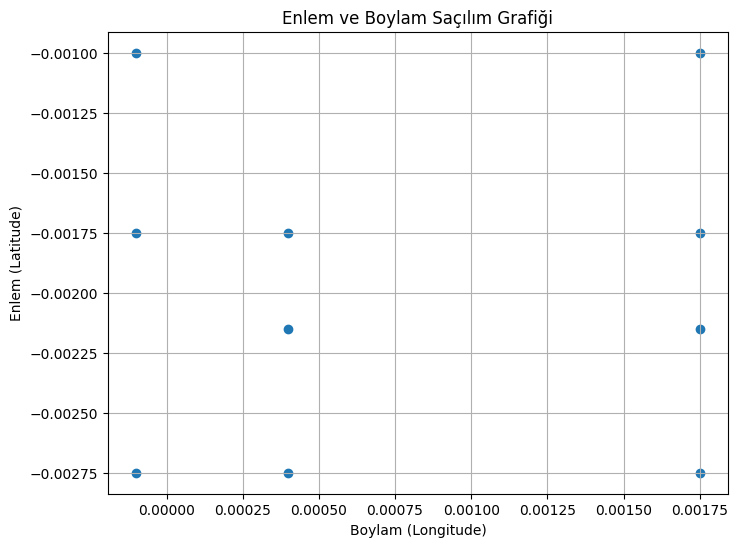

In [4]:
# Saçılım grafiğini oluştur
plt.figure(figsize=(8, 6))
plt.scatter(waypoints['longitude'], waypoints['latitude'])
plt.xlabel('Boylam (Longitude)')
plt.ylabel('Enlem (Latitude)')
plt.title('Enlem ve Boylam Saçılım Grafiği')
plt.grid(True)
plt.show()

In [5]:
def generate_points(df, indeks1, indeks2, aralik_mesafesi):
    """
    Verilen iki nokta arasındaki mesafeyi eşit aralıklarla bölerek yeni noktalar oluşturur (NumPy linspace ile).

    Args:
        df (pd.DataFrame): Enlem ve boylam bilgilerini içeren DataFrame.
                           Sütun isimlerinin 'latitude' ve 'longitude' olması beklenir.
        indeks1 (int): Başlangıç noktasının DataFrame indeksi.
        indeks2 (int): Bitiş noktasının DataFrame indeksi.
        aralik_mesafesi (float): Yeni noktalar arasındaki yaklaşık istenen mesafe.
                                 linspace tam olarak bu mesafeyi tutturamayabilir.

    Returns:
        pd.DataFrame: Başlangıç noktası, eşit aralıklı ara noktalar ve bitiş noktasını içeren DataFrame.
                      'latitude' ve 'longitude' sütunlarına sahiptir.
                      Eğer aralık mesafesi çok küçükse veya iki nokta çakışıksa,
                      sadece başlangıç ve bitiş noktalarını içeren bir DataFrame dönebilir.
    """
    nokta1 = df.loc[indeks1][['latitude', 'longitude']].values
    nokta2 = df.loc[indeks2][['latitude', 'longitude']].values

    toplam_mesafe = np.sqrt(np.sum((nokta2 - nokta1)**2))

    if aralik_mesafesi <= 0 or toplam_mesafe == 0:
        return pd.DataFrame([nokta1, nokta2], columns=['latitude', 'longitude'])

    # Kaç adet nokta (ara nokta + başlangıç + bitiş) gerektiğini yaklaşık olarak hesapla
    nokta_sayisi = int(np.ceil(toplam_mesafe / aralik_mesafesi)) + 1

    if nokta_sayisi <= 2:
        return pd.DataFrame([nokta1, nokta2], columns=['latitude', 'longitude'])

    # linspace ile eşit aralıklı noktaları oluştur
    esit_aralikli_noktalar = np.linspace(nokta1, nokta2, nokta_sayisi)

    # DataFrame olarak çıktı ver
    kolon_isimleri = ['latitude', 'longitude']
    dolu_df = pd.DataFrame(esit_aralikli_noktalar, columns=kolon_isimleri)

    return dolu_df

In [6]:
df = generate_points(waypoints,0,1,0.00005)
waypoints = pd.concat([waypoints, df], ignore_index=True)

df = generate_points(waypoints,2,3,0.00005)
waypoints = pd.concat([waypoints, df], ignore_index=True)
df = generate_points(waypoints,3,4,0.00005)
waypoints = pd.concat([waypoints, df], ignore_index=True)

df = generate_points(waypoints,5,6,0.00005)
waypoints = pd.concat([waypoints, df], ignore_index=True)
df = generate_points(waypoints,7,8,0.00005)
waypoints = pd.concat([waypoints, df], ignore_index=True)
df = generate_points(waypoints,8,9,0.00005)
waypoints = pd.concat([waypoints, df], ignore_index=True)



df = generate_points(waypoints,0,2,0.00005)
waypoints = pd.concat([waypoints, df], ignore_index=True)
df = generate_points(waypoints,2,7,0.00005)
waypoints = pd.concat([waypoints, df], ignore_index=True)

df = generate_points(waypoints,3,5,0.00005)
waypoints = pd.concat([waypoints, df], ignore_index=True)

df = generate_points(waypoints,5,8,0.00005)
waypoints = pd.concat([waypoints, df], ignore_index=True)

df = generate_points(waypoints,1,4,0.00005)
waypoints = pd.concat([waypoints, df], ignore_index=True)
df = generate_points(waypoints,4,9,0.00005)
waypoints = pd.concat([waypoints, df], ignore_index=True)

In [7]:
waypoints.head(20)

,timestamp,latitude,longitude,altitude,junction
0,0.0,-0.00100,-0.00010,0.0,0.0
1,0.0,-0.00100,0.00175,0.0,0.0
2,0.0,-0.00175,-0.00010,0.0,0.0
3,0.0,-0.00175,0.00040,0.0,0.0
4,0.0,-0.00175,0.00175,0.0,0.0
5,0.0,-0.00215,0.00040,0.0,0.0
6,0.0,-0.00215,0.00175,0.0,0.0
7,0.0,-0.00275,-0.00010,0.0,0.0
8,0.0,-0.00275,0.00040,0.0,0.0
9,0.0,-0.00275,0.00175,0.0,0.0


In [8]:
waypoints.loc[0] = [ 0 , -0.00100, -0.00010 , 0,1]
waypoints.loc[1] = [ 0 , -0.00100, 0.00175 , 0,1]

waypoints.loc[2] = [ 0 , -0.00175, -0.00010 , 0,1]
waypoints.loc[3] = [ 0 , -0.00175, 0.00040 , 0,1]
waypoints.loc[4] = [ 0 , -0.00175, 0.00175 , 0,1]

waypoints.loc[5] = [ 0 , -0.00215, 0.00040 , 0,1]
waypoints.loc[6] = [ 0 , -0.00215, 0.00175 , 0,1]

waypoints.loc[7] = [ 0 , -0.00275, -0.00010 , 0,1]
waypoints.loc[8] = [ 0 , -0.00275, 0.00040 , 0,1]
waypoints.loc[9] = [ 0 , -0.00275, 0.00175 , 0,1]

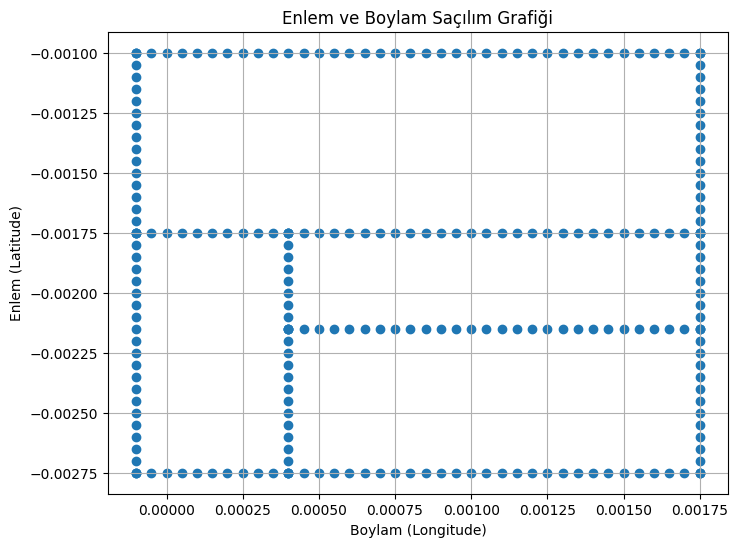

In [9]:
# Saçılım grafiğini oluştur
plt.figure(figsize=(8, 6))
plt.scatter(waypoints['longitude'], waypoints['latitude'])
plt.xlabel('Boylam (Longitude)')
plt.ylabel('Enlem (Latitude)')
plt.title('Enlem ve Boylam Saçılım Grafiği')
plt.grid(True)
plt.show()

In [11]:
waypoints = waypoints.fillna(0)
waypoints.describe()

,timestamp,latitude,longitude,altitude,junction
count,250.0,250.000000,250.000000,250.0,250.000000
mean,0.0,-0.001926,0.000811,0.0,0.040000
std,0.0,0.000599,0.000679,0.0,0.196352
min,0.0,-0.002750,-0.000100,0.0,0.000000
25%,0.0,-0.002437,0.000250,0.0,0.000000
50%,0.0,-0.001900,0.000725,0.0,0.000000
75%,0.0,-0.001550,0.001500,0.0,0.000000
max,0.0,-0.001000,0.001750,0.0,1.000000


In [ ]:
# Mevcut indeksleri al
indeksler = waypoints.index.tolist()

# İndeksleri rastgele karıştır
np.random.shuffle(indeksler)

# Karıştırılmış indekslere göre DataFrame'i yeniden indeksle
waypoints = waypoints.reindex(indeksler)

waypoints.to_csv("data/sent_gnss.csv",index=False)